<a href="https://colab.research.google.com/github/nicole-yoong/Portfolio/blob/main/Breast_Cancer_Detection/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

# Variables explaination

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Import packages

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Setup complete.")

Setup complete.


# Loading data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Python/Datasets/BreastCancer.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data exploration

Download the dataset and prepare a summary of the features available on the 
dataset including data type (numerical/ categorical), amount of missing data in 
individual fields. This can be included as an appendix.


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(569, 33)

# Categorical encoding

In [6]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 767 kB/s 


In [7]:
import category_encoders as ce

enc = ce.OrdinalEncoder(cols=['diagnosis'],
                        handle_missing='return_nan',return_df= True)

df=enc.fit_transform(df)
type(df)

pandas.core.frame.DataFrame

# Visualization

## Malignant vs. benign

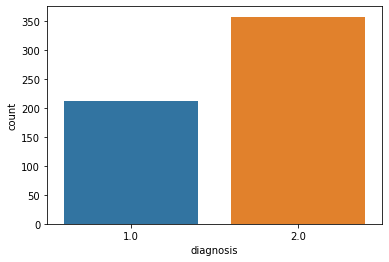

In [8]:
sns.countplot(x= 'diagnosis', data=df)

## Violin plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

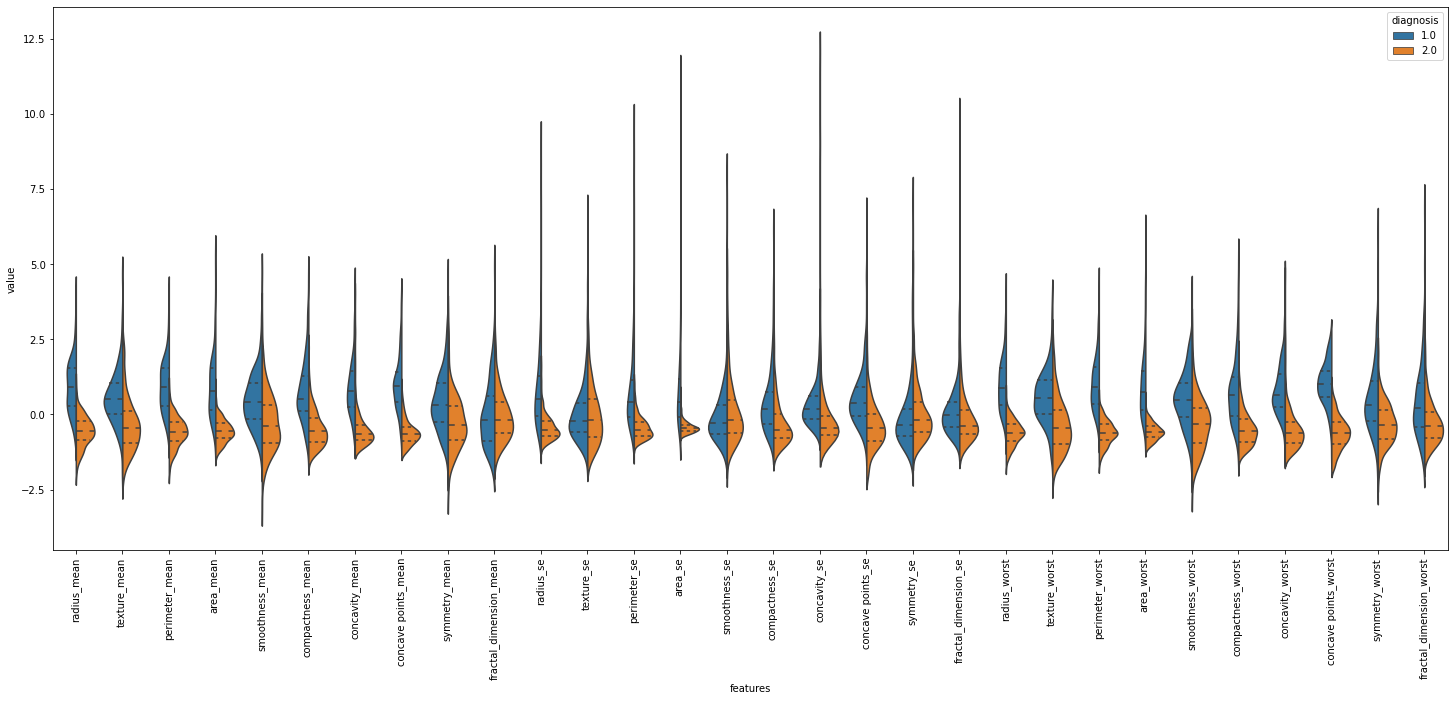

In [9]:
#define X and y
X = df.loc[:, ~df.columns.isin(['diagnosis','id','Unnamed: 32'])]
y = df["diagnosis"] 

#standardization
stdrz_X = (X - X.mean()) / (X.std())              
X = pd.concat([y,stdrz_X],axis=1)
X = pd.melt(X,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=X, split=True, inner="quart")
plt.xticks(rotation=90)

# Correlation

### Remove highly correlated columns

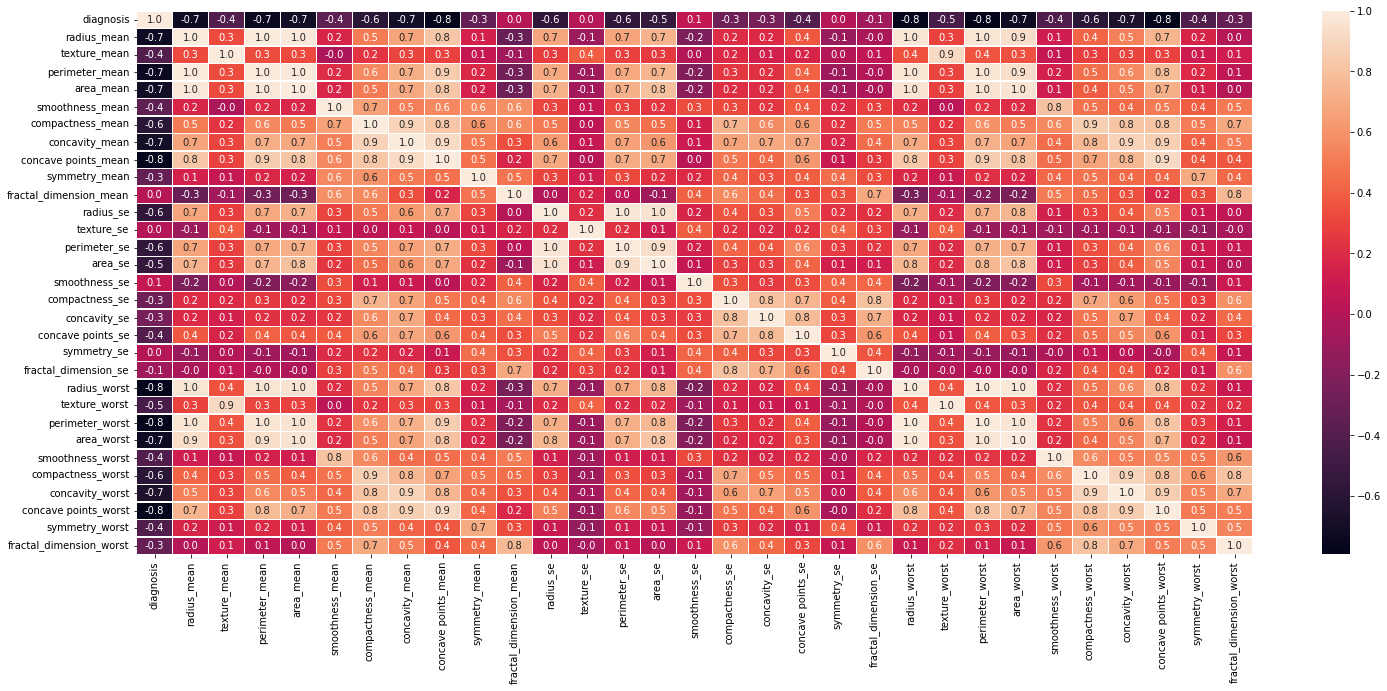

In [10]:

import seaborn as sns
C = df.loc[:, ~df.columns.isin(['id','Unnamed: 32'])]
plt.figure(figsize=(25,10))
sns.heatmap(C.corr(), annot=True, linewidths=.5, fmt= '.1f')


In [11]:
cor_matrix = C.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                      NaN     0.730029      0.415185        0.742636   
radius_mean                    NaN          NaN      0.323782        0.997855   
texture_mean                   NaN          NaN           NaN        0.329533   
perimeter_mean                 NaN          NaN           NaN             NaN   
area_mean                      NaN          NaN           NaN             NaN   
smoothness_mean                NaN          NaN           NaN             NaN   
compactness_mean               NaN          NaN           NaN             NaN   
concavity_mean                 NaN          NaN           NaN             NaN   
concave points_mean            NaN          NaN           NaN             NaN   
symmetry_mean                  NaN          NaN           NaN             NaN   
fractal_dimension_mean         NaN          NaN           NaN             NaN   
radius_se                   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [12]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(); print(to_drop)


['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


## Jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x720 with 0 Axes>

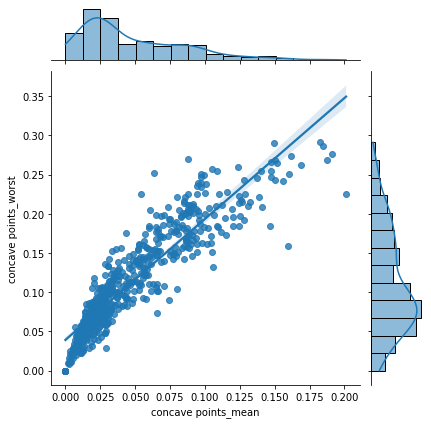

In [13]:
plt.figure(figsize = (15,10))
sns.jointplot(C['concave points_mean'], C['concave points_worst'],kind='reg')
plt.show()

## Compare the results by checking the outliers 

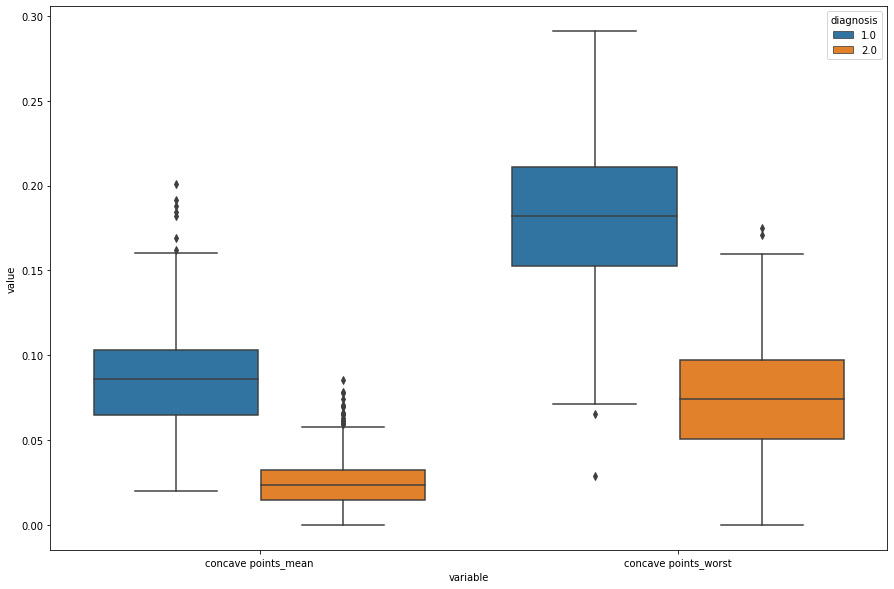

In [14]:
df_out = pd.melt(C,id_vars = "diagnosis",value_vars = ['concave points_mean', 'concave points_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= df_out)
plt.show()

The differences in result might be due to the presence of outliers in these variables. 

## Dropping columns

In [15]:
D = C.loc[:, ~C.columns.isin(['perimeter_mean', 'area_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'])]

# Class imbalance

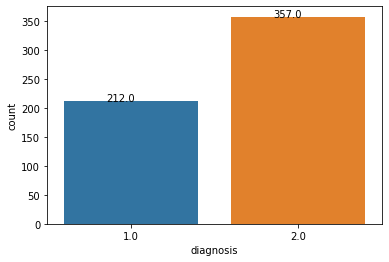

In [16]:
ax = sns.countplot(x= 'diagnosis', data=D)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [17]:
from sklearn.utils import resample

df_majority = D[D.diagnosis==2.0]
df_minority = D[D.diagnosis==1.0]


# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=357,    
                                 random_state=123) 


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Show dataset statistics
print(df_upsampled.describe())
 
# Display new class counts
df_upsampled.diagnosis.value_counts()

D = df_upsampled

        diagnosis  radius_mean  texture_mean  smoothness_mean  \
count  714.000000   714.000000    714.000000       714.000000   
mean     1.500000    14.743094     19.822787         0.097935   
std      0.500351     3.740169      4.278616         0.014376   
min      1.000000     6.981000      9.710000         0.052630   
25%      1.000000    11.992500     16.850000         0.087593   
50%      1.500000    13.870000     19.575000         0.097610   
75%      2.000000    17.140000     22.202500         0.106600   
max      2.000000    28.110000     39.280000         0.163400   

       compactness_mean  concavity_mean  symmetry_mean  \
count        714.000000      714.000000     714.000000   
mean           0.114425        0.104367       0.183946   
std            0.057457        0.084281       0.027590   
min            0.019380        0.000000       0.106000   
25%            0.071252        0.035370       0.164200   
50%            0.104400        0.087410       0.181300   
75%     

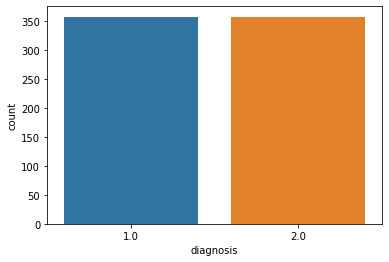

In [18]:
sns.countplot(x= 'diagnosis', data=D)

In [19]:
D.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
19,2.0,13.540,14.36,0.09779,0.08129,0.06664,0.1885,0.05766,0.2699,0.7886,...,0.014600,0.02387,0.013150,0.01980,0.002300,0.14400,0.17730,0.23900,0.2977,0.07259
20,2.0,13.080,15.71,0.10750,0.12700,0.04568,0.1967,0.06811,0.1852,0.7477,...,0.018980,0.01698,0.006490,0.01678,0.002425,0.13120,0.27760,0.18900,0.3184,0.08183
21,2.0,9.504,12.44,0.10240,0.06492,0.02956,0.1815,0.06905,0.2773,0.9768,...,0.014320,0.01985,0.014210,0.02027,0.002968,0.13240,0.11480,0.08867,0.2450,0.07773
37,2.0,13.030,18.42,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,2.3420,...,0.004899,0.01343,0.011640,0.02671,0.001777,0.09701,0.04619,0.04833,0.1987,0.06169
46,2.0,8.196,16.84,0.08600,0.05943,0.01588,0.1769,0.06503,0.1563,0.9567,...,0.016460,0.01588,0.005917,0.02574,0.002582,0.12970,0.13570,0.06880,0.3105,0.07409


# Feature selection

## SelectKBest

In [20]:
X = D.loc[:, ~D.columns.isin(["diagnosis"])]
y = D["diagnosis"] 

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import chi2

selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X,y)

In [22]:
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                 Feat_names  Mutual_info
0               radius_mean     0.447922
4            concavity_mean     0.445885
17          concavity_worst     0.386035
7                 radius_se     0.342614
3          compactness_mean     0.325459
16        compactness_worst     0.324526
12        concave points_se     0.264723
1              texture_mean     0.239571
11             concavity_se     0.223739
2           smoothness_mean     0.215395
15         smoothness_worst     0.208945
18           symmetry_worst     0.203696
10           compactness_se     0.201970
19  fractal_dimension_worst     0.199661
14     fractal_dimension_se     0.182436
13              symmetry_se     0.173365
5             symmetry_mean     0.166654
9             smoothness_se     0.156362
6    fractal_dimension_mean     0.148635
8                texture_se     0.140678


In [23]:
# verify the correlation using spearman correlation test
import scipy.stats as stats

columns = ['concavity_mean', 'radius_mean', 'concavity_worst', 'radius_se','compactness_worst', 'compactness_mean']
for x in columns:
  data = D[[x,'diagnosis']]
  cor, pval = stats.spearmanr(data[[x]], data[['diagnosis']])
  print (x + '' + ': ' + 'Spearman correlation test : correlation coefficient : %.4f, pval: %.4f' % (cor, pval))

concavity_mean: Spearman correlation test : correlation coefficient : -0.7672, pval: 0.0000
radius_mean: Spearman correlation test : correlation coefficient : -0.7361, pval: 0.0000
concavity_worst: Spearman correlation test : correlation coefficient : -0.7275, pval: 0.0000
radius_se: Spearman correlation test : correlation coefficient : -0.6309, pval: 0.0000
compactness_worst: Spearman correlation test : correlation coefficient : -0.6278, pval: 0.0000
compactness_mean: Spearman correlation test : correlation coefficient : -0.6438, pval: 0.0000


In [24]:
X = D.loc[:, D.columns.isin(['concavity_mean', 'radius_mean', 'concavity_worst', 'radius_se','compactness_worst', 'compactness_mean'])]
y = D["diagnosis"] 

# Construct Model

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1, stratify=y)

In [30]:
pipe_dt=Pipeline([('scl',StandardScaler()),
                 ('pca',PCA(n_components=2))
                 ])

x_train = pipe_dt.fit_transform(X_train)
x_test = pipe_dt.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(499, 6) (499,) (215, 6)


# Linear Model: Logistic Regression

In [31]:
no_tune = LogisticRegression(random_state=1024)
no_tune.fit(x_train, y_train)
y_pred = no_tune.predict(x_test)

print(classification_report(y_test, no_tune.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.78      0.76      0.77       107
         2.0       0.77      0.79      0.78       108

    accuracy                           0.77       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.77      0.77      0.77       215



In [32]:
no_tune = PassiveAggressiveClassifier(random_state=1024)
no_tune.fit(x_train, y_train)
y_pred = no_tune.predict(x_test)

print(classification_report(y_test, no_tune.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.75      0.64      0.69       107
         2.0       0.69      0.79      0.73       108

    accuracy                           0.71       215
   macro avg       0.72      0.71      0.71       215
weighted avg       0.72      0.71      0.71       215



# Tree Mode: Decision Tree

Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree

In [33]:
cv_split = ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [34]:
# base model
dtc = DecisionTreeClassifier(random_state=1024)
base_model = cross_validate(dtc, x_train, y_train, cv  = cv_split, return_train_score = True)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print('Parameters: ', dtc.get_params())
print("Train score mean: {:.2f}". format(base_model['train_score'].mean()*100)) 
print("Test score mean: {:.2f}". format(base_model['test_score'].mean()*100))
print('-'*30)

print(classification_report(y_test, y_pred))

Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1024, 'splitter': 'best'}
Train score mean: 100.00
Test score mean: 91.27
------------------------------
              precision    recall  f1-score   support

         1.0       0.81      0.71      0.76       107
         2.0       0.74      0.83      0.79       108

    accuracy                           0.77       215
   macro avg       0.78      0.77      0.77       215
weighted avg       0.78      0.77      0.77       215



In [35]:
# gridsearch to find the best parameters 
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [2, 4, 6, 8, 10, None], #max depth tree can grow; default is none
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
dtc = DecisionTreeClassifier(random_state=1024)
tuned_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = cv_split, verbose=True, return_train_score = True)
tuned_dtc.fit(x_train, y_train)
best_estimator = tuned_dtc.best_estimator_
y_pred = best_estimator.predict(x_test)

print('Parameters: ', tuned_dtc.get_params())
print("Train score mean: {:.2f}". format(tuned_dtc.cv_results_['mean_train_score'][tuned_dtc.best_index_]*100)) 
print("Test score mean: {:.2f}". format(tuned_dtc.cv_results_['mean_test_score'][tuned_dtc.best_index_]*100)) 
print('-'*10)

print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Parameters:  {'cv': ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6), 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1024, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1024), 'n_jobs': None, 'param_grid': {'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ['gini', 'entropy']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': None, 'verbose': True}
Train score mean: 92.64
Test score mean: 91.33
----------
     

## Confusion matrix

([<matplotlib.axis.YTick at 0x7ff8d028bcd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

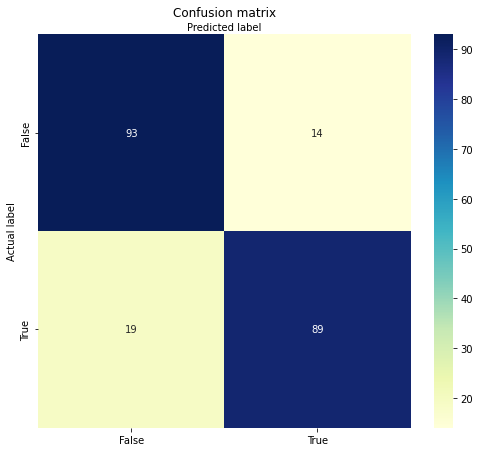

In [36]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Tree Model: Extra Tree 

In [37]:
# base model
etc = ExtraTreeClassifier(random_state=1024)
base_model = cross_validate(etc, x_train, y_train, cv  = cv_split, return_train_score = True)
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)
print('Parameters: ', etc.get_params())
print("Train score mean: {:.2f}". format(base_model['train_score'].mean()*100)) 
print("Test score mean: {:.2f}". format(base_model['test_score'].mean()*100))
print('-'*30)

print(classification_report(y_test, y_pred))

Parameters:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1024, 'splitter': 'random'}
Train score mean: 100.00
Test score mean: 91.47
------------------------------
              precision    recall  f1-score   support

         1.0       0.82      0.79      0.81       107
         2.0       0.80      0.82      0.81       108

    accuracy                           0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.81      0.81      0.81       215



In [38]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [2, 3, 5, 10, 20, 25],
              'min_samples_leaf': [5, 10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
etc = ExtraTreeClassifier(random_state=1024)
tuned_etc = GridSearchCV(estimator = etc, param_grid = param_grid, cv = cv_split, verbose=True, return_train_score = True)
tuned_etc.fit(x_train, y_train)
best_estimator = tuned_etc.best_estimator_
y_pred = best_estimator.predict(x_test)

print('Parameters: ', tuned_dtc.get_params())
print("Train score mean: {:.2f}". format(tuned_etc.cv_results_['mean_train_score'][tuned_etc.best_index_]*100)) 
print("Test score mean: {:.2f}". format(tuned_etc.cv_results_['mean_test_score'][tuned_etc.best_index_]*100)) 
print('-'*10)

print(classification_report(y_test, best_estimator.predict(x_test)))

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Parameters:  {'cv': ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6), 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': 1024, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(random_state=1024), 'n_jobs': None, 'param_grid': {'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ['gini', 'entropy']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': True, 'scoring': None, 'verbose': True}
Train score mean: 85.92
Test score mean: 85.73
----------
     

([<matplotlib.axis.YTick at 0x7ff8d01f6dd0>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

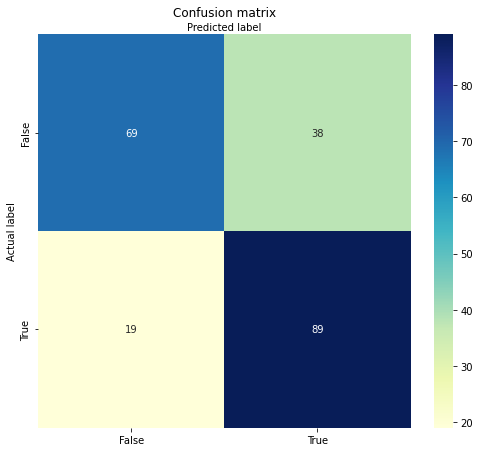

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Ensemble Model: Random Forest

In [40]:
param_grid = {'max_depth': [5, 10, 20, 25],
              'min_samples_leaf': [10, 20, 50, 100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


## Classification report

In [41]:
print(classification_report(y_test, best_estimator.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.96      0.92      0.94       107
         2.0       0.92      0.96      0.94       108

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215



## Confusion matrix

([<matplotlib.axis.YTick at 0x7ff8d01c1f50>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

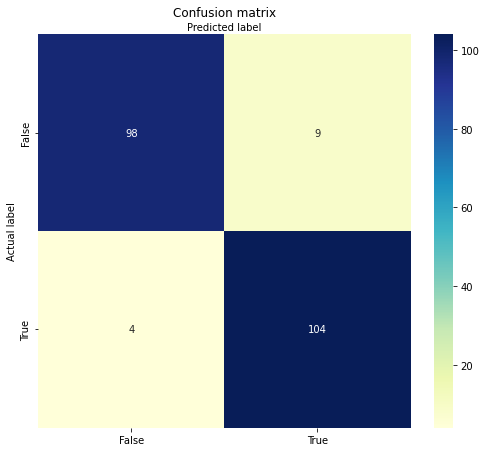

In [42]:
cnf_matrix = confusion_matrix(y_test, y_pred)

%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Ensemble Model: Bagging 

In [43]:
no_tune = BaggingClassifier(random_state=1024)
no_tune.fit(x_train, y_train)
y_pred = no_tune.predict(x_test)

print(classification_report(y_test, no_tune.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.79      0.72      0.75       107
         2.0       0.74      0.81      0.77       108

    accuracy                           0.76       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.76      0.76      0.76       215



# K-means Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = D.loc[:, D.columns.isin(['radius_mean', 'concavity_worst', 'concavity_mean', 'radius_se', 'compactness_mean'])].to_numpy()
labels_true = D['diagnosis']

scaler = StandardScaler()
X = scaler.fit_transform(X)

k_means = KMeans(2)
k_means.fit(X)

labels_pred = k_means.predict(X)
print(labels_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 

In [45]:
from sklearn.manifold import TSNE

#Creating a 2D visualization to visualize the clusters
tsne = TSNE(verbose=1, perplexity=40, n_iter= 250)
Y = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 714 samples in 0.001s...
[t-SNE] Computed neighbors for 714 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 714 / 714
[t-SNE] Mean sigma: 0.414686


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.031738
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


Text(0.5, 1.0, 'Actual clusters')

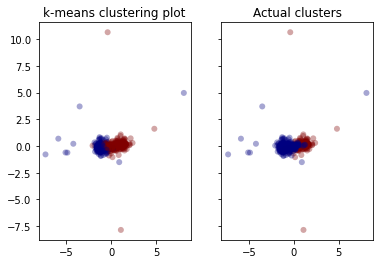

In [46]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = D['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

In [48]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

score = adjusted_mutual_info_score(labels_true, labels_pred)
score

0.45613413170460937

In [49]:
# We can use unsupervised to learn which features are strongly correlated with each other.
# This can be used as an unsupervised form of feature pruning.

from sklearn.cluster import FeatureAgglomeration


agglo = FeatureAgglomeration(n_clusters = 2,linkage="average")
agglo.fit(X)

X_reduced = agglo.transform(X)

k_means = KMeans(3)
k_means.fit(X_reduced)

labels_pred = k_means.predict(X_reduced)
print(labels_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 1 1 1 1 2 1 2 2 0 1 1 1
 0 1 1 1 1 2 2 2 0 2 1 1 2 1 2 2 1 1 2 1 1 2 2 2 1 2 2 1 2 1 1 0 2 2 1 1 2
 1 1 0 2 2 2 2 2 1 2 1 2 1 1 0 2 2 2 2 0 1 1 2 1 0 2 2 2 2 1 1 2 2 1 2 2 2
 2 1 2 1 1 2 1 2 1 2 2 2 1 1 1 2 1 1 1 0 1 2 2 1 0 1 2 2 0 1 2 2 1 1 1 2 1
 0 2 1 2 2 1 1 0 0 1 2 1 

In [50]:
score_reduced = adjusted_rand_score(labels_true, labels_pred)
print("Full features score", score)
print("Reduced Features score: ", score_reduced)

Full features score 0.45613413170460937
Reduced Features score:  0.49175477620971403
